<a href="https://colab.research.google.com/github/Sohampimpalgaonkar/DL/blob/main/dl_pract_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No. 03**

Write a Program to Gradient Descent Algorithm

Gradient Descent Parameters (θ0, θ1): [153.73654391  47.14112176]
Test MSE (Gradient Descent): 4061.8259284949268


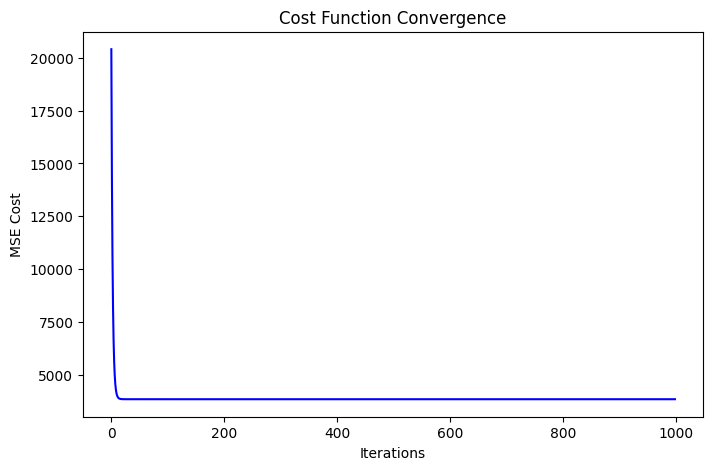

Normal Equation Parameters (θ0, θ1): [153.73654391  47.14112176]
Test MSE (Normal Equation): 4061.8259284949263


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Using BMI feature only
y = diabetes.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term (column of ones)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Batch Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2,1)  # Initialize theta0 and theta1
    y = y.reshape(-1,1)
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = (1/m) * np.sum((X.dot(theta) - y)**2)
        cost_history.append(cost)

    return theta, cost_history

# Train the model using Gradient Descent
theta_gd, cost_history = gradient_descent(X_train_b, y_train, learning_rate=0.1, n_iterations=1000)

# Predictions
y_pred_gd = X_test_b.dot(theta_gd)

# Evaluate model
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Gradient Descent Parameters (θ0, θ1):", theta_gd.ravel())
print("Test MSE (Gradient Descent):", mse_gd)

# Plot cost vs iterations
plt.figure(figsize=(8,5))
plt.plot(cost_history, color='blue')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("MSE Cost")
plt.show()

# Compare with Normal Equation (Closed-form solution)
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
y_pred_normal = X_test_b.dot(theta_normal)
mse_normal = mean_squared_error(y_test, y_pred_normal)
print("Normal Equation Parameters (θ0, θ1):", theta_normal.ravel())
print("Test MSE (Normal Equation):", mse_normal)
